train_test_split: Uses 80% of the dataset for training and 20% for testing.
TfidVectorizer: Used to represent the articles in numeric features.
TF: Term frequency, number of times a word is repeated
IDF: Inverse Document Frequency, tells about some important terms by comparing them  with other documents.
LinerSVC: Linear Support Vector Classifier, the actual model used. Best for text data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [2]:
file_path = 'IFND.csv'

# Specify the encoding (e.g., 'utf-8', 'utf-16', 'iso-8859-1', etc.)
encoding = 'iso-8859-1'

try:
    data = pd.read_csv(file_path, encoding=encoding)
    # Display the first few rows of the DataFrame
    data.head()
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")

In [3]:
data['fake'] = data['Label'].apply( lambda x: 0 if x == "TRUE" else 1)

In [4]:
data = data.drop("Label", axis=1)

In [5]:
fake_count = (data['fake'] == 1).sum()  # Assuming 'FAKE' represents fake articles
real_count = (data['fake'] == 0).sum()  # Assuming 'REAL' represents real articles

print(f"Number of Fake Articles: {fake_count}")
print(f"Number of Real Articles: {real_count}")

Number of Fake Articles: 18914
Number of Real Articles: 37800


In [6]:
X = data['Statement'] + data['Web'] + data['Category']

In [7]:
y = data['fake']

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [9]:
vectorizer = TfidfVectorizer(stop_words = "english", max_df = 0.7)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [10]:
print("X_train_vectorized shape:", X_train_vectorized.shape)
print("y_train shape:", y_train.shape)

X_train_vectorized shape: (45371, 50818)
y_train shape: (45371,)


In [11]:
len(X_train)

45371

In [12]:
len(X_test)

11343

In [13]:
clf = LinearSVC(dual=False)
clf.fit(X_train_vectorized, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,False
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [14]:
clf.score(X_test_vectorized, y_test)

0.9678215639601516

In [15]:
clf.score(X_train_vectorized, y_train)

0.9967159639417249

In [16]:
X_test.iloc[10]

"MHA confirms suspension of MP IPS officer caught 'beating wife' in videoTRIBUNEINDIAVIOLENCE"

In [17]:
with open("my_Text.txt", "w", encoding = "utf-8") as f:
        f.write(X_test.iloc[10])

In [18]:
with open("my_Text.txt", "r", encoding = "utf-8") as f:
        text = f.read()

In [19]:
vectorized_text = vectorizer.transform([text])

In [20]:
prediction = clf.predict(vectorized_text)
if prediction == 0:
    print("The new article is predicted as real.")
else:
    print("The new article is predicted as fake.")

The new article is predicted as real.


In [21]:
y_test.iloc[10]

np.int64(0)

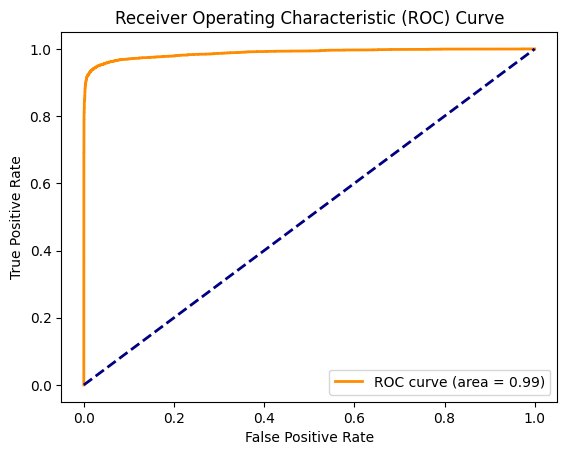

In [22]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, clf.decision_function(X_test_vectorized))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

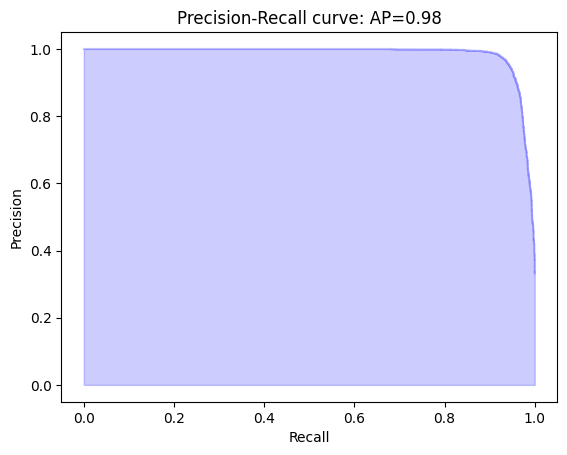

In [24]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, clf.decision_function(X_test_vectorized))
average_precision = average_precision_score(y_test, clf.decision_function(X_test_vectorized))

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

In [25]:
import joblib

# Save the trained model
joblib.dump(clf, 'fake_news_model.pkl')

# Save the vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [26]:
import joblib

# Save the trained model
joblib.dump(clf, 'fake_news_model.pkl')

# Save the vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']